In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display

In [3]:
from heatmap_grammar import Plot, Heatmap, RowAnnotation, ColumnAnnotation, markdown

In [4]:
import pandas as pd
import numpy as np

Examples in here are based on [ComplexHeatmap Complete Reference](https://jokergoo.github.io/ComplexHeatmap-reference/book/). When using `heatmap-grammar` in publications please consider citing `ComplexHeatmap`.

# 2. A Single Heatmap

In [5]:
mat = pd.read_csv('data/random.csv', index_col=0)
mat.iloc[:3, :3]

,column1,column2,column3
row1,0.904742,-0.352298,0.501610
row2,0.908830,0.791571,1.072632
row3,0.280747,0.029875,0.705259


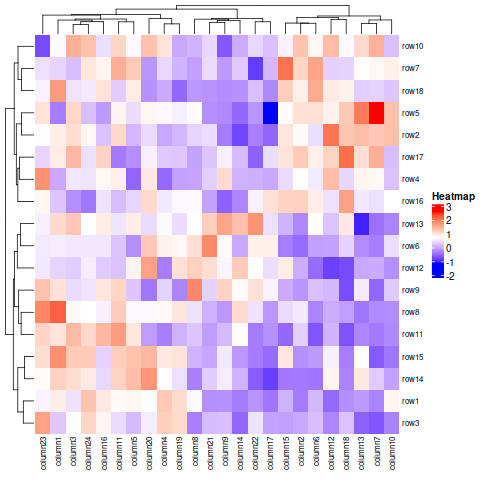

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='', name='heatmap1', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [6]:
Heatmap(mat)

## 2.1 Colors

The default colour scheme differs from `ComplexHeatmap`:
- it does not automatically scale to quantiles,
- it does not enforce symmetrical range.

The `ComplexHeatmap`'s default can be reproduced as follows:

In [7]:
from heatmap_grammar import scale_fill_gradient2, scale_fill_gradient_n

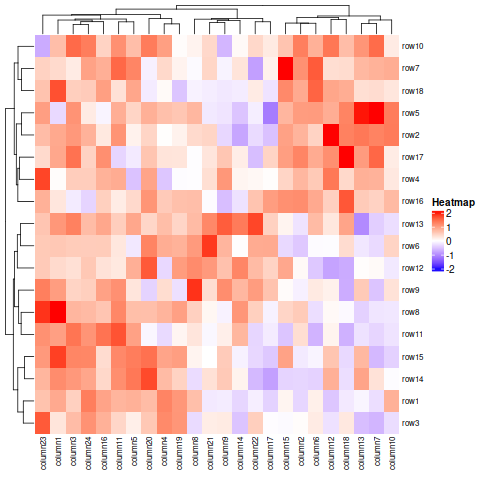

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='', name='heatmap2', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient2(aesthetic='fill', guide='colourbar', name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0.01, 0.99], symmetrical=True, color_ramp_kwargs={}, low='blue', mid='white', high='red', midpoint=unset)}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [8]:
(
    Heatmap(mat)
    + scale_fill_gradient2(quantiles=[0.01, 0.99], symmetrical=True)
)

In general, colours are managed by ggplot-style scales. You can choose from a number of R and Python packages to generate colour scales, for example:

In [9]:
from rpy2.robjects.packages import importr
gr_devices = importr('grDevices')

In [10]:
rainbow = {
    'R': 'red',
    'a': 'orange',
    'i': 'yellow',
    'n': 'green',
    'b': 'blue',
    'o': '#4B0082', # indigo
    'w': 'violet',
}

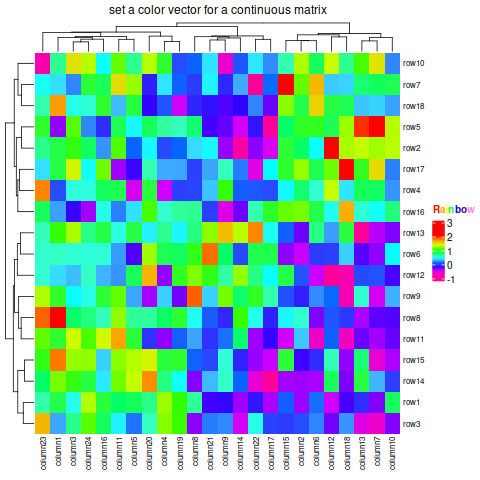

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='set a color vector for a continuous matrix', name='heatmap3', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide='colourbar', name=MarkdownData(text='<span style="color: red">R</span><span style="color: orange">a</span><span style="color: yellow">i</span><span style="color: green">n</span><span style="color: blue">b</span><span style="color: #4B0082">o</span><span style="color: violet">w</span>'), na_value='grey50', _fitted=False, colors=['#FF0099', '#CC00FF', '#3300FF', '#0066FF', '#00FFFF', '#00FF66', '#33FF00', '#CCFF00', '#FF9900', '#FF0000'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0.01, 0.99], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [11]:
(
    Heatmap(mat, title='set a color vector for a continuous matrix')
    + scale_fill_gradient_n(
        colors=reversed(gr_devices.rainbow(10)),
        quantiles=[0.01, 0.99],
        name=markdown(''.join([
            f'<span style="color: {color}">{letter}</span>'
            for letter, color in rainbow.items()
        ]))
    )
)

To set colour for missing balues, use `na_value` (note: with underscore, not `na.value`):

In [12]:
np.random.seed(0)
mat_with_na = mat.mask(np.random.random(mat.shape) < .1)

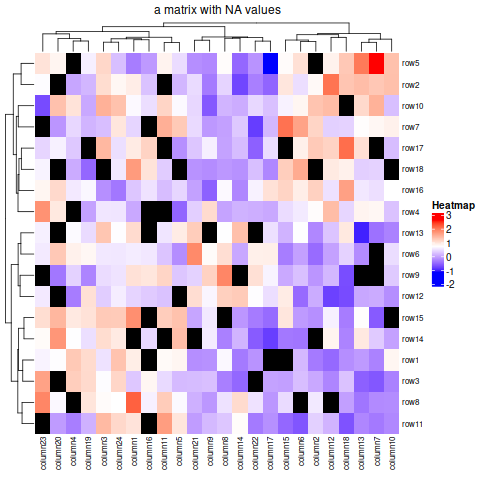

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='a matrix with NA values', name='heatmap4', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient2(aesthetic='fill', guide='colourbar', name=unset, na_value='black', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={}, low='blue', mid='white', high='red', midpoint=unset)}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [13]:
(
    Heatmap(
        mat_with_na,
        title='a matrix with NA values'
    )
    + scale_fill_gradient2(na_value='black')
)

## 2.3 Clustering

### 2.3.1 Distance methods

In [14]:
mat_with_outliers = mat.copy()
for i in range(10):
    mat_with_outliers.iloc[i, i] = 1000

In [15]:
from heatmap_grammar import clustering_distance, scale_fill_gradient_n, HeatmapTheme

In [16]:
from sklearn.metrics.pairwise import nan_euclidean_distances

In [17]:
@clustering_distance
def robust_dist(data: pd.DataFrame):
    low = data.quantile(0.1)
    high = data.quantile(0.9)
    is_deemed_outlier = (data < low) | (data > high)
    without_outliers = data.mask(is_deemed_outlier)
    return pd.DataFrame(nan_euclidean_distances(without_outliers))

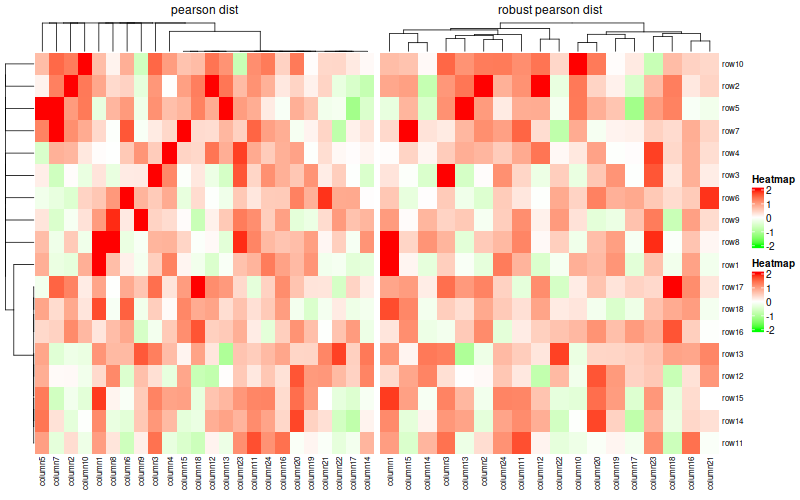

In [18]:
robust_scale = scale_fill_gradient_n(
    colors=['green', 'white', 'red'],
    points=[-2, 0, 2],
    quantiles=[0.01, 0.95],
    symmetrical=True
)
(
    Plot().size(w=800, h=500)
    + (
        Heatmap(
            mat_with_outliers,
            title='pearson dist'
        )
        + robust_scale
    )
    + (
        Heatmap(
            mat_with_outliers,
            clustering_distance_rows=robust_dist,
            clustering_distance_columns=robust_dist,
            title='robust pearson dist'
        )
        + robust_scale
    )
)

To use non-vectorised (slower, but sometimes easier to write out) version, include two arguments:

In [19]:
@clustering_distance
def robust_dist_simple(x: np.array, y: np.array):
    qx = np.quantile(x, [0.1, 0.9])
    qy = np.quantile(y, [0.1, 0.9])
    ind = (x > qx[0]) & (x < qx[1]) & (y > qy[0]) & (y < qy[1])
    x = x[ind]
    y = y[ind]
    return np.sqrt(np.sum((x - y) ** 2))

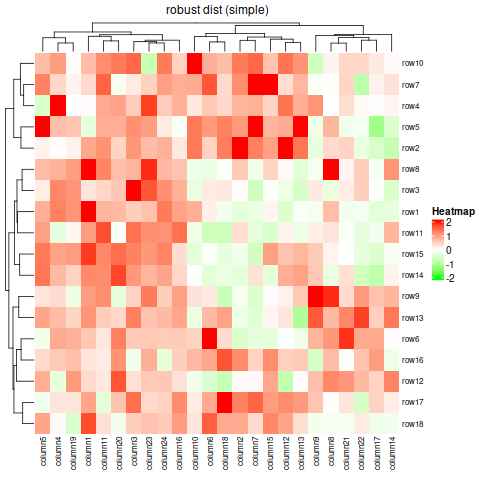

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='robust dist (simple)', name='heatmap7', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns=<rpy2.rinterface.SexpClosure object at 0x7f6337778840> [RTYPES.CLOSXP], clustering_method_columns='complete', clustering_distance_rows=<rpy2.rinterface.SexpClosure object at 0x7f6337778840> [RTYPES.CLOSXP], clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide='colourbar', name='Heatmap', na_value='grey50', _fitted=True, colors=['green', 'white', 'red'], space='LAB', limits=None, points=[-2, 0, 2], breaks=unset, quantiles=[0.01, 0.95], symmetrical=True, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [20]:
(
    Heatmap(
        mat_with_outliers,
        clustering_distance_rows=robust_dist_simple,
        clustering_distance_columns=robust_dist_simple,
        title='robust dist (simple)'
    )
    + robust_scale
)

In [21]:
@clustering_distance
def robust_pearson_dist(data: pd.DataFrame):
    low = data.quantile(0.1)
    high = data.quantile(0.9)
    is_deemed_outlier = (data < low) | (data > high)
    without_outliers = data.mask(is_deemed_outlier)
    return 1 - without_outliers.corr(method='pearson')

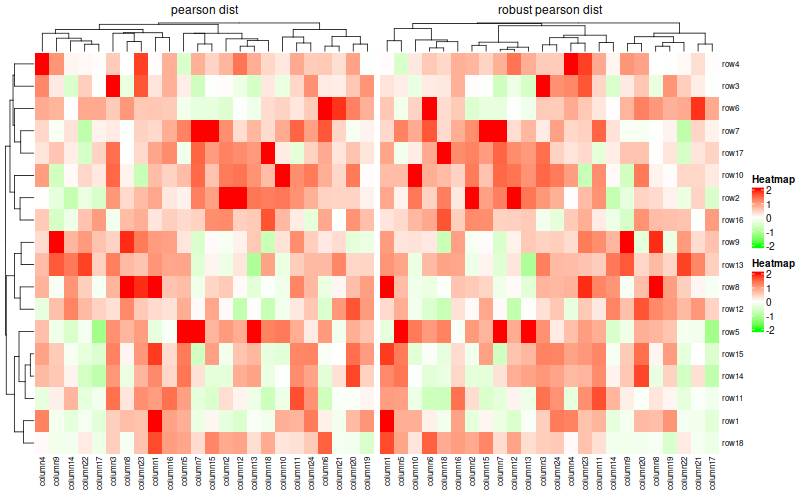

In [22]:
(
    Plot().size(w=800, h=500)
    + (
        Heatmap(
            mat_with_outliers,
            clustering_distance_rows='pearson',
            clustering_distance_columns='pearson',
            title='pearson dist'
        )
        + robust_scale
    )
    + (
        Heatmap(
            mat_with_outliers,
            clustering_distance_rows=robust_pearson_dist,
            clustering_distance_columns=robust_pearson_dist,
            title='robust pearson dist'
        )
        + robust_scale
    )
)

### 2.3.3 Render dendrograms

In [23]:
from heatmap_grammar.rpy2_helpers import py2rpy

In [24]:
dendextend = importr('dendextend')
stats = importr('stats')

r_mat = py2rpy(mat)
row_dend = stats.as_dendrogram(stats.hclust(stats.dist(r_mat)))
row_dend = dendextend.color_branches(row_dend, k=2)

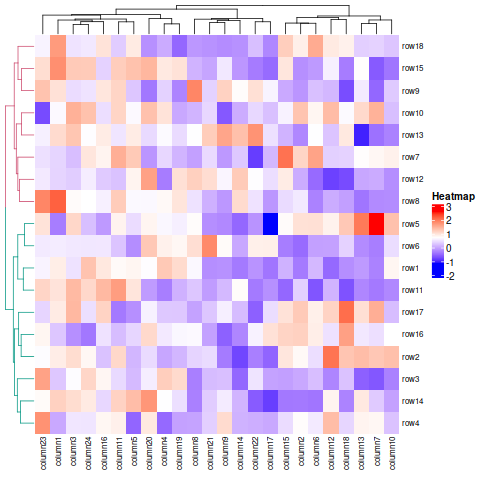

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='', name='heatmap10', cluster_rows=<rpy2.robjects.vectors.ListVector object at 0x7f6337522b80> [RTYPES.VECSXP]
R classes: ('dendrogram',)
[ListSexpVector, ListSexpVector]
  <no name>: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f6337658280> [RTYPES.VECSXP]
  <no name>: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f633773b300> [RTYPES.VECSXP], cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [25]:
Heatmap(mat, cluster_rows=row_dend)

In [26]:
from rpy2.rinterface import rternalize
import random

circlize = importr('circlize')
base = importr('base')

assign_attr = base._env['attr<-']

In [27]:
@rternalize
def annotate_node(d):
    value = base.list(
        cex=0.8,
        pch=random.choice(range(20)),
        col=circlize.rand_color(1)
    )
    return assign_attr(d, 'nodePar', value=value)

In [28]:
from heatmap_grammar import RowDendrogram, unit

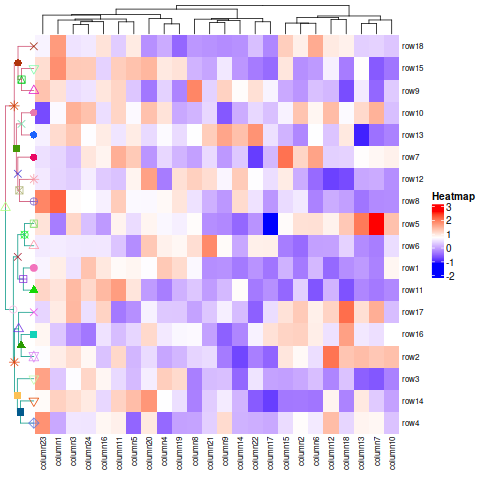

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='', name='heatmap11', cluster_rows=<rpy2.robjects.vectors.ListVector object at 0x7f63a47a8180> [RTYPES.VECSXP]
R classes: ('dendrogram',)
[ListSexpVector, ListSexpVector]
  <no name>: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f6337430e40> [RTYPES.VECSXP]
  <no name>: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x7f63374300c0> [RTYPES.VECSXP], cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=2, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [29]:
row_dend2 = stats.dendrapply(row_dend, annotate_node)
Heatmap(mat, cluster_rows=row_dend2) + RowDendrogram(width=unit(2, "cm"))

### 2.3.4 Reorder dendrograms

In [30]:
m2 = pd.DataFrame(np.arange(1, 101).reshape((10, 10)))

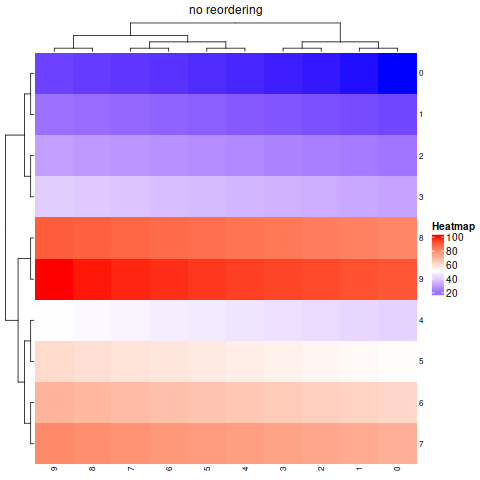

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='no reordering', name='heatmap12', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=False, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

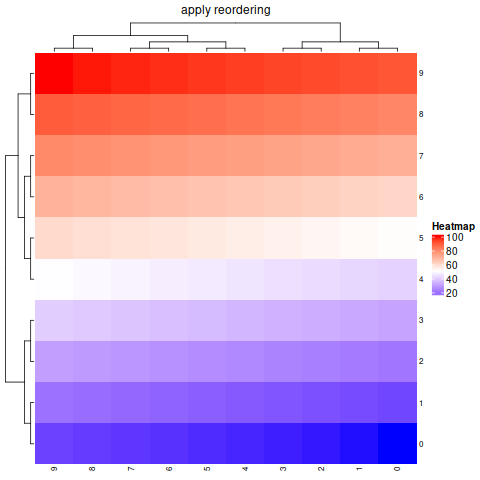

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='apply reordering', name='heatmap13', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=True, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=unset)

In [31]:
display(
    Heatmap(m2, title='no reordering') + RowDendrogram(reorder=False),
    Heatmap(m2, title='apply reordering') + RowDendrogram(reorder=True)
)

## 2.9 Customize the heatmap body

### 2.9.1 cell_fun 

In [32]:
grid = importr('grid')

In [33]:
from heatmap_grammar import cell_overlay

In [34]:
small_mat = mat.iloc[:9, :9]

@cell_overlay
def overlay_text(j, i, x, y, width, height, fill):
    value = small_mat.iloc[i, j].squeeze()
    grid.grid_text(
        f'{value:.1f}',
        x, y,
        gp = grid.gpar(fontsize = 10)
    )

In [39]:
gwr_scale = scale_fill_gradient_n(
    breaks=[-2, 0, 2],
    colors=["green", "white", "red"],
    quantiles=[0.01, 0.99],
    symmetrical=True,
    name="mat",
)

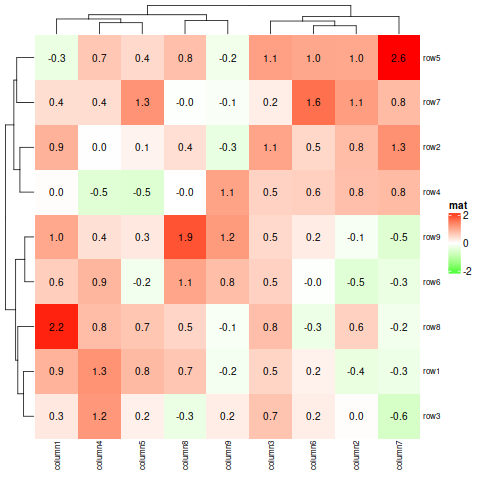

Heatmap(weight=None, border=False, top_annotation=None, height=unset, width=unset, row_gap=unset, column_gap=unset, title='', name='heatmap14', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide='colourbar', name='mat', na_value='grey50', _fitted=False, colors=['green', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=[-2, 0, 2], quantiles=[0.01, 0.99], symmetrical=True, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True, column_names_rot=unset, cell_fun=<rpy2.rinterface.SexpClosure object at 0x7f63372736c0> [RTYPES.CLOSXP])

In [40]:
(
    Heatmap(
        small_mat,
        cell_fun=overlay_text
    )
    + gwr_scale
)

# 3. Heatmap Annotations

Annotations in `heatmap_grammar` are defined in a manner similar to `ggplot2` in two steps:
- passing a data frame with values for all row (`RowAnnotation`) or column (`ColumnAnnotation`) annotations at once
- adding geoms (wrapped in `Annotation` call) for each annotation layer.

It is best demonstrated on an example:

In [32]:
matrix_data = pd.DataFrame(
    np.random.normal(size=100).reshape((10, 10)),
    index=[f'R{i}' for i in range(10)],
    columns=[f'C{i}' for i in range(10)]
)
matrix_data.iloc[:3, :3]

,C0,C1,C2
R0,0.773253,-1.183881,-2.659172
R1,-0.687838,-1.214077,-0.440923
R2,1.364532,-0.689449,-0.652294


Row data needs to have index which agrees 1:1 with the matrix data index.
This is checked to ensure that correct values are shown by the relevant row.

In [33]:
row_data = pd.DataFrame(
    dict(
        foo1=np.random.uniform(size=10),
        bar1=np.random.uniform(size=10)
    ),
    index=matrix_data.index
)
row_data.head(3)

,foo1,bar1
R0,0.623295,0.829897
R1,0.886961,0.968286
R2,0.618826,0.919783


Similarly, columns data index needs to agree 1:1 with the matrix data columns:

In [34]:
column_data = pd.DataFrame(
    dict(
        foo2=np.random.uniform(size=10),
        bar2=np.random.uniform(size=10)
    ),
    index=matrix_data.columns
)
column_data.head(3)

,foo2,bar2
C0,0.446394,0.061079
C1,0.907876,0.907733
C2,0.160230,0.739884


In [35]:
from heatmap_grammar import Annotation, aes

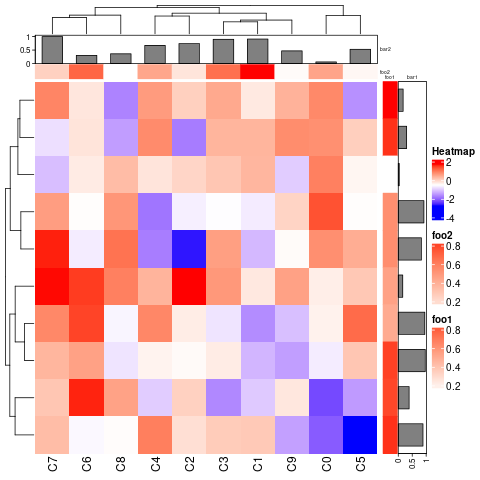

In [36]:
column_ha = (
    ColumnAnnotation(data=column_data)
    + Annotation(geom='barplot', mapping=aes(value='bar2'))
    + Annotation(geom='simple', mapping=aes(color='foo2'))
)
row_ha = (
    RowAnnotation(data=row_data)
    + Annotation(geom='simple', mapping=aes(color='foo1'))
    + Annotation(geom='barplot', mapping=aes(value='bar1'))
)
(
    Plot()
    + Heatmap(matrix_data, top_annotation=column_ha)
    + row_ha
)

In [37]:
from heatmap_grammar import scale_color_gradient, scale_fill_gradient, scale_fill_manual

You can modify the colour scale using `ggplot2`/`plotnine`-style scales:

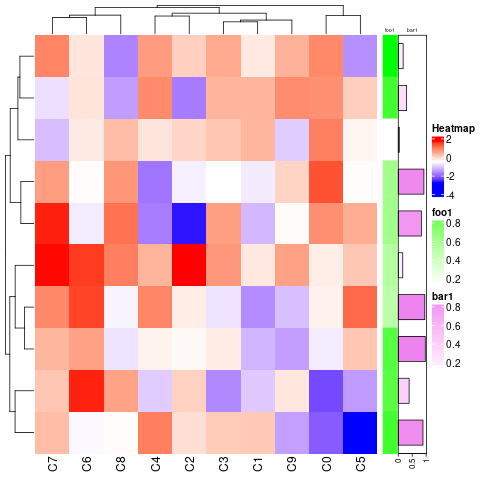

In [38]:
(
    Plot()
    + Heatmap(matrix_data)
    + (
        RowAnnotation(data=row_data)
        + Annotation(geom='simple', mapping=aes(color='foo1'))
        + scale_color_gradient(low='white', high='green')
        + Annotation(geom='barplot', mapping=aes(value='bar1', fill='bar1'))
        + scale_fill_gradient(low='white', high='violet')
    )
)

## Placement

Note the difference in annotation placement relative to the dendrogram when using `/` vs when using `top_annotation=`:

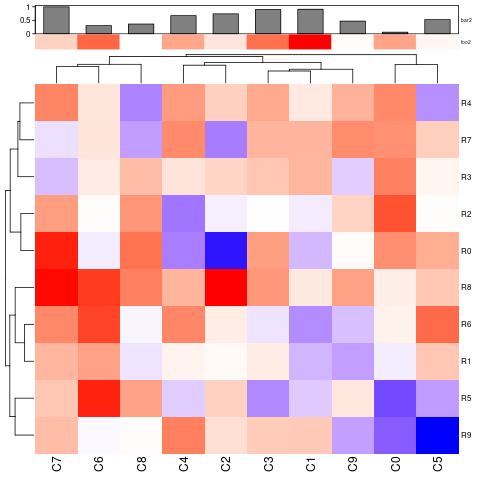

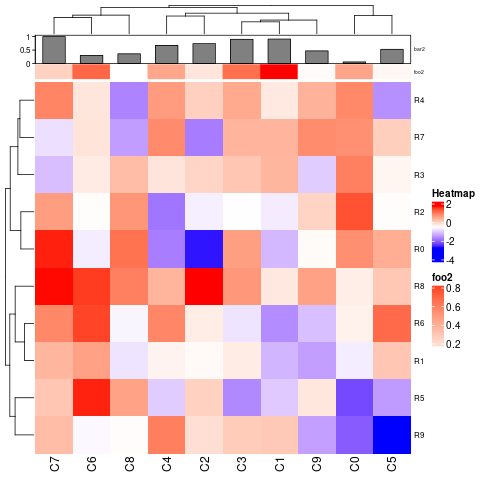

Heatmap(weight=None, border=False, top_annotation=ColumnAnnotation(mapping=None, layers=[Annotation(geom='barplot', mapping={'value': 'bar2'}, label=None, height=None, width=None, label_rotation=0, label_side='auto', label_size=5, stat='auto', position='auto', geom_arguments={}, gp_arguments={}, active_scales=[], scales={}), Annotation(geom='simple', mapping={'color': 'foo2'}, label=None, height=None, width=None, label_rotation=0, label_side='auto', label_size=5, stat='auto', position='auto', geom_arguments={}, gp_arguments={}, active_scales=[scale_fill_gradient(aesthetic='fill', guide='colourbar', name='foo2', na_value='grey50', _fitted=True, colors=['white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={}, low='white', high='red')], scales={})], default_label_side='right', which='column', gap=None, height=None, width=None, allow_missing=False), height=unset, width=unset, row_gap=unset, column_gap=unset, title='', name='heatmap17', cluster_rows=unset, cluster_columns=unset, show_row_names=unset, show_column_names=unset, clustering_distance_columns='euclidean', clustering_method_columns='complete', clustering_distance_rows='euclidean', clustering_method_rows='complete', row_names=GraphicalParameters(**{'fontsize': 8}), column_title=GraphicalParameters(**{}), column_labels=unset, column_order=unset, row_order=unset, row_labels=unset, layer_fun=unset, scales={'fill': scale_fill_gradient_n(aesthetic='fill', guide=guide_colourbar(title=unset, label=True, direction='vertical', border=unset, background=unset), name=unset, na_value='grey50', _fitted=False, colors=['blue', 'white', 'red'], space='LAB', limits=None, points=unset, breaks=unset, quantiles=[0, 1], symmetrical=False, color_ramp_kwargs={})}, dendrograms={'row': RowDendrogram(show=True, side=unset, reorder=unset, axis='row', decorate=None, width=Unit(x=1, units='cm', data=None)), 'column': ColumnDendrogram(show=True, side=unset, reorder=unset, axis='column', decorate=None, height=Unit(x=1, units='cm', data=None))}, manage_heatmap_legend=True)

In [39]:
display(
    Plot() + column_ha / Heatmap(matrix_data),
    Heatmap(matrix_data, top_annotation=column_ha)
)

## 3.8 Barplot annotation

### Multiple bars (stacked or dodged)

You can create stacked bars by using duplicated index; for example if columns correspond to patients, and each patient could have taken one or more of medications A, B, C, each zero or more times:

In [40]:
import random

In [41]:
total_medications_n = 50
random.seed(0)

medication_data = pd.DataFrame(
    dict(
        Medication=random.choices(
            ['drug A', 'drug B', 'drug C'],
            k=total_medications_n
        )
    ),
    index=random.choices(matrix_data.columns, k=total_medications_n)
)
medication_data.head(3)

,Medication
C8,drug C
C4,drug C
C0,drug B


In [42]:
np.random.seed(0)

patient_data = pd.DataFrame(
    dict(
        Age=np.random.normal(loc=30, scale=20, size=10),
        BMI=np.random.normal(loc=25, scale=10, size=10).round(1)
    ),
    index=matrix_data.columns
)
patient_data.head(3)

,Age,BMI
C0,65.281047,26.4
C1,38.003144,39.5
C2,49.574760,32.6


In [43]:
len(patient_data), len(medication_data)

(10, 50)

In [44]:
patient_metadata = medication_data.join(patient_data)
patient_metadata.head(7)

,Medication,Age,BMI
C0,drug B,65.281047,26.4
C0,drug A,65.281047,26.4
C0,drug B,65.281047,26.4
C1,drug C,38.003144,39.5
C1,drug A,38.003144,39.5
C1,drug C,38.003144,39.5
C2,drug C,49.574760,32.6


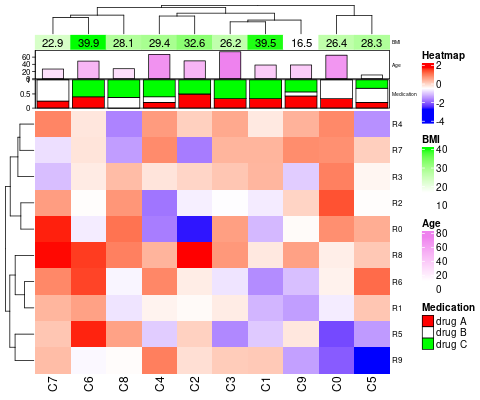

In [45]:
(
    Plot().size(h=400)
    + Heatmap(
        matrix_data,
        top_annotation=(
            ColumnAnnotation(data=patient_metadata)
            + Annotation(geom='simple', mapping=aes(color='BMI', label='BMI'))
            + scale_color_gradient(low='white', high='green')
            + Annotation(geom='barplot', mapping=aes(fill='Age'), stat='unique')
            + scale_fill_gradient(low='white', high='violet')
            + Annotation(
                geom='barplot',
                mapping=aes(value='Medication', fill='Medication'),
                position='fill',
                geom_arguments={'bar_width': 0.9}
            )
            + scale_fill_manual(values={
                'drug A': 'red',
                'drug B': 'white',
                'drug C': 'green',
            })
        )
    )
)

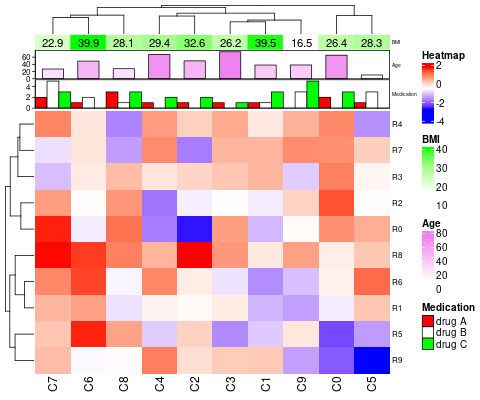

In [46]:
(
    Plot().size(h=400)
    + Heatmap(
        matrix_data,
        top_annotation=(
            ColumnAnnotation(data=patient_metadata)
            + Annotation(geom='simple', mapping=aes(color='BMI', label='BMI'))
            + scale_color_gradient(low='white', high='green')
            + Annotation(geom='barplot', mapping=aes(fill='Age'), stat='unique')
            + scale_fill_gradient(low='white', high='violet')
            + Annotation(
                geom='barplot',
                mapping=aes(value='Medication', fill='Medication'),
                position='dodge',
                geom_arguments={'bar_width': 1}
            )
            + scale_fill_manual(values={
                'drug A': 'red',
                'drug B': 'white',
                'drug C': 'green',
            })
        )
    )
)

## 3.9 Boxplot annotation

For this example let's imagine that each of the patients was asked to record how long they exercised on 14 consecutive days:

In [47]:
np.random.seed(0)

exercise_data = pd.concat([
    pd.DataFrame(
        dict(
            Day=day,
            MinutesOfExercise=np.random.uniform(size=10) * 120
        ),
        index=matrix_data.columns
    )
    for day in range(14)
])
exercise_data.head(3)

,Day,MinutesOfExercise
C0,0,65.857620
C1,0,85.822724
C2,0,72.331605


In [48]:
patient_metadata_2 = exercise_data.join(patient_data)
patient_metadata_2.head(7)

,Day,MinutesOfExercise,Age,BMI
C0,0,65.857620,65.281047,26.4
C0,1,95.007005,65.281047,26.4
C0,2,117.434201,65.281047,26.4
C0,3,31.746673,65.281047,26.4
C0,4,43.140948,65.281047,26.4
C0,5,68.423612,65.281047,26.4
C0,6,19.076350,65.281047,26.4


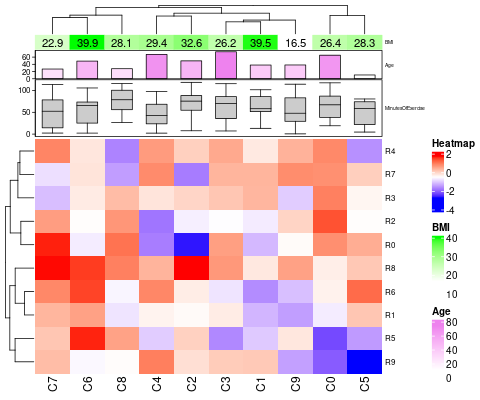

In [49]:
(
    Plot().size(h=400)
    + Heatmap(
        matrix_data,
        top_annotation=(
            ColumnAnnotation(data=patient_metadata_2)
            + Annotation(geom='simple', mapping=aes(color='BMI', label='BMI'))
            + scale_color_gradient(low='white', high='green')
            + Annotation(geom='barplot', mapping=aes(fill='Age'), stat='unique')
            + scale_fill_gradient(low='white', high='violet')
            + Annotation(
                geom='boxplot',
                mapping=aes(value='MinutesOfExercise'),
            )
        )
    )
)

## 3.10 Histogram annotation

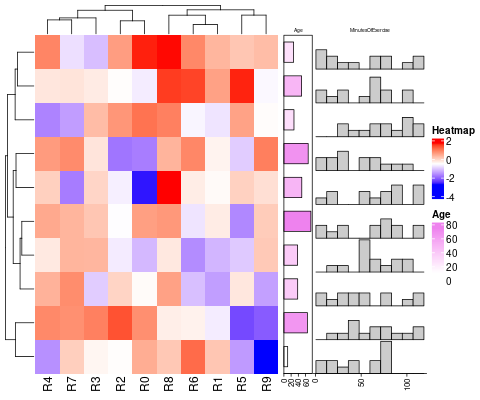

In [50]:
(
    Plot().size(h=400)
    + Heatmap(matrix_data.T)
    + (
        RowAnnotation(data=patient_metadata_2)
        + Annotation(geom='barplot', mapping=aes(fill='Age'), stat='unique')
        + scale_fill_gradient(low='white', high='violet')
        + Annotation(
            geom='histogram',
            mapping=aes(value='MinutesOfExercise'),
            stat='identity'
        )
    )
)

## 3.11 Density annotation

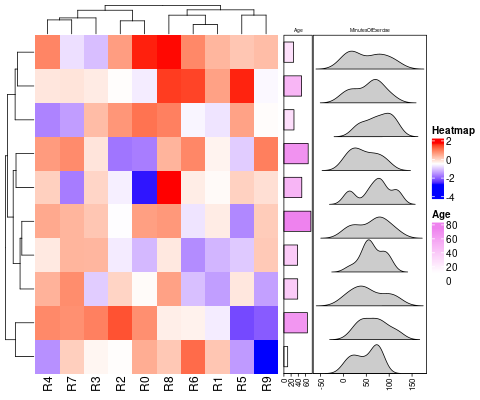

In [51]:
(
    Plot().size(h=400)
    + Heatmap(matrix_data.T)
    + (
        RowAnnotation(data=patient_metadata_2)
        + Annotation(geom='barplot', mapping=aes(fill='Age'), stat='unique')
        + scale_fill_gradient(low='white', high='violet')
        + Annotation(
            geom='density',
            mapping=aes(value='MinutesOfExercise'),
            stat='identity'
        )
    )
)

# 14. More Examples

Original source: https://jokergoo.github.io/ComplexHeatmap-reference/book/more-examples.html

## 14.3 Visualize Cell Heterogeneity from Single Cell RNASeq

In [50]:
expr = pd.read_table('mouse_scRNAseq_corrected.txt', index_col=0)
expr.iloc[:3, :3]

,Cell 1,Cell 2,Cell 3
Gnai3,3.23220,1.98320,2.2482
Cdc45,3.19810,1.17300,3.1705
Narf,0.29411,0.49389,1.6279


In [51]:
len(expr)

7073

Drop duplicate genes:

In [52]:
expr = expr[~expr.index.duplicated(keep='first')]
len(expr)

7071

In [53]:
expr = expr[(expr > 0).mean(axis=1) > 0.5]
len(expr)

6092

Extract "signature" genes:

In [54]:
def get_correlated_variable_genes(data, cor_cutoff=0.5, n_cutoff=20):
    dt = expr.T.corr(method='spearman')
    np.fill_diagonal(dt.values, 0)
    dt[dt.abs() < cor_cutoff] = 0
    dt[dt < 0] = -1
    dt[dt > 0] = 1
    should_keep = dt.abs().sum() > n_cutoff
    return expr[should_keep]

In [55]:
mat = get_correlated_variable_genes(expr)

In [56]:
from scipy.stats import zscore

In [57]:
def trim_and_scale(df):
    df = df.copy()
    q10 = df.quantile(0.1, axis=1)
    q90 = df.quantile(0.9, axis=1)
    return (
        df.T
        .mask(df.T < q10, other=q10, axis=1)
        .mask(df.T > q90, other=q90, axis=1)
        .T
        .apply(zscore, axis=1)
    )

In [58]:
mat2 = trim_and_scale(mat)

In [59]:
cc = pd.read_csv('data/mouse_cell_cycle_gene.csv', index_col=0).squeeze()
rp = pd.read_csv('data/mouse_ribonucleoprotein.csv', index_col=0).squeeze()

In [60]:
from heatmap_grammar import aes, scale_fill_manual, Annotation, unit, ColumnDendrogram, RowDendrogram

In [61]:
base_mean = mat.mean(axis=1).rename('base expr')

In [62]:
rpl = pd.Series(
    mat.index.isin(rp),
    index=mat.index,
    name='ribonucleoprotein'
)

In [63]:
ccl = pd.Series(
    mat.index.isin(cc),
    index=mat.index,
    name='cell cycle'
)

In [64]:
names_to_highlight = (
    (ccl & (base_mean > base_mean.quantile(0.25)))
    .to_frame('should_annotate')
    .assign(gene=lambda df: df.index)
)
names_to_highlight.head(3)

,should_annotate,gene
Sdhd,False,Sdhd
Ccnd2,True,Ccnd2
Dazap2,False,Dazap2


In [65]:
grid = importr('grid')

In [66]:
from rpy2.rinterface import NA

In [67]:
@rternalize
def highlight_split(tree):
    assignments = list(
        stats.cutree(stats.as_hclust(tree), k=2)
        .rx(stats.order_dendrogram(tree))
    )
    rev_assignments = assignments[::-1]

    def first_index(i):
        return assignments.index(i) + 1

    def last_index(i):
        return len(assignments) - rev_assignments.index(i) - 1 + 1

    x1 = pd.Series([first_index(1), first_index(2)]) - 1
    x2 = pd.Series([last_index(1), last_index(2)])

    positions = x1 / len(assignments)
    widths = (x2 - x1) / len(assignments)

    return grid.grid_rect(
        x=base.c(*positions),
        width=base.c(*widths),
        just='left',
        default_units='npc',
        gp=grid.gpar(
            fill=base.c("#FF000040", "#00FF0040"),
            col=NA
        )
    )

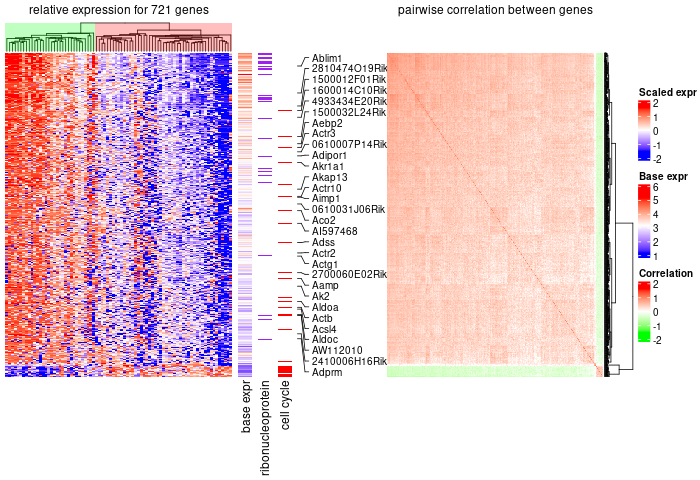

In [68]:
(
    Plot().size(w=700)
    + (
        Heatmap(
            mat2,
            name='scaled_expr',
            title=f'relative expression for {len(mat)} genes',
            show_column_names=False,
            show_row_names=False,
            width=unit(8, 'cm'),
        )
        + scale_fill_gradient_n(
            colors=['blue', 'white', 'red'],
            points=[-1.5, 0, 1.6],
            name='Scaled expr',
        )
        + ColumnDendrogram(decorate=highlight_split)
    )
    + (
        Heatmap(
            base_mean,
            show_row_names=False,
            width=unit(5, "mm"),
        )
        + scale_fill_gradient_n(
            colors=['blue', 'white', 'red'],
            name='Base expr'
        )
    )
    + (
        Heatmap(
            rpl + 0,
            show_row_names=False,
            width=unit(5, "mm"),
        )
        + scale_fill_manual(
            values={'0': 'white', '1': 'purple'},
            guide='none'
        )
    )
    + (
        Heatmap(
            ccl + 0,
            show_row_names=False,
            width=unit(5, "mm"),
        )
        + scale_fill_manual(
            values={'0': 'white', '1': 'red'},
            guide='none'
        )
    )
    + (
        RowAnnotation(names_to_highlight)
        + Annotation(
            geom='mark',
            mapping=aes(
                value='should_annotate',
                label='gene'
            ),
            geom_arguments=dict(
                labels_gp=grid.gpar(fontsize=10),
                padding=grid.unit(1, 'mm')
            )
        )
    )
    + (
        Heatmap(
            mat2.T.corr(),
            name='cor',
            title='pairwise correlation between genes',
            show_column_names=False,
            show_row_names=False
        )
        + ColumnDendrogram(show=False)
        + RowDendrogram(side='right')
        + scale_fill_gradient_n(
            colors=['green', 'white', 'red'],
            points=[-1.5, 0, 1.6],
            name='Correlation',
        )
    )
    + HeatmapTheme(main_heatmap='cor', heatmap_legend_side='right')
)

## 14.4 Correlations between methylation, expression and other genomic features

In [69]:
mat_meth = pd.read_csv('data/mat_meth.csv', index_col=0)
mat_expr = pd.read_csv('data/mat_expr.csv', index_col=0)
sample_metadata = pd.read_csv('data/sample_metadata.csv', index_col=0)
feature_metadata = pd.read_csv('data/feature_metadata', index_col=0)

In [70]:
mat_meth.iloc[:3, :3]

,sample1,sample2,sample3
1,0.095090,0.102540,0.124248
2,0.178949,0.204363,0.366321
3,0.198834,0.090136,0.163469


In [71]:
mat_expr.iloc[:3, :3]

,sample1,sample2,sample3
1,1.263807,0.413712,0.179443
2,-0.693792,-0.017349,1.245534
3,0.557743,0.622618,1.578816


In [72]:
sample_metadata.head(3)

,type
sample1,Tumor
sample2,Tumor
sample3,Tumor


In [73]:
feature_metadata.head(3)

,direction,cor_pvalue,gene_type,anno_gene,dist,enhancer_1,enhancer_2,enhancer_3
1,hypo,0.656034,protein_coding,intergenic,388737,0.071965,0.000000,0.287931
2,hypo,0.578228,psedo-gene,intergenic,97280,0.758371,0.355495,0.000000
3,hypo,0.349494,psedo-gene,intergenic,36426,0.000000,0.847711,0.000000


In [74]:
column_tree = stats.hclust(stats.dist(py2rpy(mat_meth.T)))
column_order = column_tree.rx2('order')

In [75]:
from heatmap_grammar import (
    labs, guides,
    scale_color_manual, scale_color_gradient_n,
    scale_fill_gradient, scale_color_gradient,
    scale_color_brewer
)

In [76]:
methyl_annotation = (
    ColumnAnnotation(sample_metadata)
    + (
        Annotation(
            geom='simple',
            mapping=aes(color='type'),
            label_side='left'
        )
        + scale_color_manual(values={
            'Tumor': 'pink',
            'Control': 'royalblue'
        })
    )
)

In [77]:
enhancer_data = (
    feature_metadata
    .loc[:, feature_metadata.columns.str.startswith('enhancer')]
)

In [78]:
label_options = dict(
    label_rotation=90,
    label_side='bottom',
    label_size=12
)

In [79]:
from functools import partial

geom_simple = partial(Annotation, 'simple')

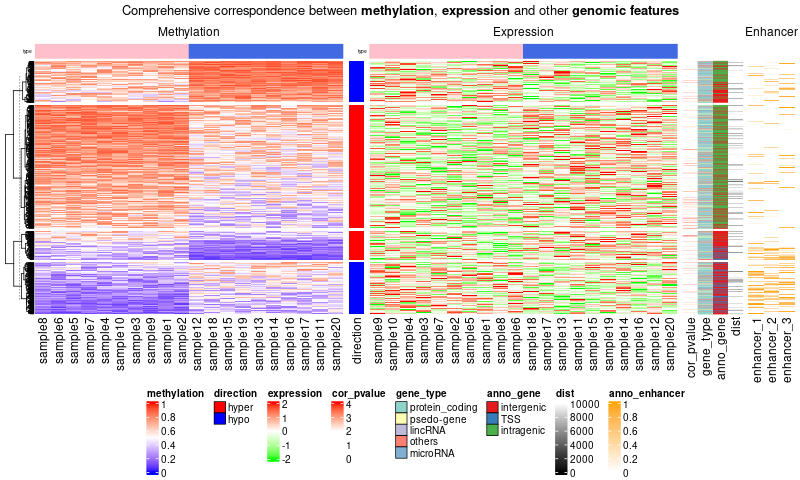

In [80]:
(
    Plot().size(w=800)
    + Heatmap(
        mat_meth,
        name='methylation',
        title='Methylation',
        column_order=column_order,
        cluster_columns=False,
        top_annotation=methyl_annotation
    )
    + scale_fill_gradient_n(
        points=[0, 0.5, 1], colors=['blue', 'white', 'red'],
        name='methylation'
    )
    + (
        Heatmap(feature_metadata.direction)
        + scale_fill_manual(
            values={'hyper': 'red', 'hypo': 'blue'},
            name='direction'
        )
    )
    + Heatmap(
        mat_expr.iloc[:, pd.Series(column_order) - 1],
        name='expression',
        column_order=column_order,
        cluster_columns=False,
        top_annotation=(
            methyl_annotation
            + guides(color='none')
        ),
        title='Expression'
    )
    + scale_fill_gradient_n(
        points=[-2, 0, 2],
        colors=['green', 'white', 'red'],
        name='expression'
    )
    + (
        RowAnnotation(
            feature_metadata,
            mapping=aes(split='direction')
        )
        + geom_simple(
            aes(color='cor_pvalue'),
            **label_options
        )
        + scale_color_gradient_n(
            points=[0, 2, 4],
            colors=['white', 'white', 'red']
        )
        + geom_simple(
            aes(color='gene_type'),
            **label_options
        )
        + scale_color_brewer(palette='Set3')
        + geom_simple(
            aes(color='anno_gene'),
            **label_options
        )
        + scale_color_brewer(palette='Set1')
        + geom_simple(
            aes(color='dist'),
            **label_options
        )
        + scale_color_gradient(limits=[0, 10000], low='black', high='white')
    )
    + Heatmap(
        enhancer_data,
        title='Enhancer',
        cluster_columns=False,
        show_row_names=False
    )
    + scale_fill_gradient(
        limits=[0, 1],
        low='white',
        high='orange',
        name='anno_enhancer'
    )
    + HeatmapTheme(heatmap_legend_side='bottom', row_km=2)
    + labs(column_title=markdown(
        'Comprehensive correspondence between **methylation**,'
        ' **expression** and other **genomic features**'
    ))
)

## 14.6 Add multiple boxplots for single row

In [81]:
m1 = pd.DataFrame(
    np.sort(
        np.random.normal(size=100)
    )
    .reshape((10, 10))
)
m2 = pd.DataFrame(
    np.sort(
        np.random.normal(size=100)
    )
    [::-1]
    .reshape((10, 10))
)

In [82]:
index = m1[[]].reset_index()

In [83]:
rg = np.array([
    min(m1.values.min(), m2.values.min()),
    max(m1.values.max(), m2.values.max())
])
rg[0] = rg[0] - (rg[1] - rg[0]) * 0.02
rg[1] = rg[1] + (rg[1] - rg[0]) * 0.02

In [84]:
from heatmap_grammar.r import complex_heatmap
from heatmap_grammar.rpy2_helpers import (
    rpy2py, py2rpy, rternalize_with_signature
)

In [85]:
@rternalize_with_signature
def draw(index, k, n):
    nr = len(index)
    index = rpy2py(index)
    # for now # this check is required as differntly to ComplexHeatmap,
    # heatmap-grammar modifies the order of rows/columns to ensure
    # agreement between differeant heatmaps using axes sorting,
    # so this boxplot will only work reliably for heatmaps
    # with pre-sorted index (where sorting is not necessary)
    assert sorted(m1.index) == list(m1.index)

    grid.pushViewport(grid.viewport(
        xscale=base.c(*rg.tolist()),
        yscale=base.c(0.5, nr + 0.5)
    ))
    for i in range(1, nr + 1):
        grid.grid_rect(y=nr - i + 1, height=1, default_units='native')
        complex_heatmap.grid_boxplot(
            py2rpy(m1.iloc[index[i - 1] - 1]),
            pos=nr - i + 1 + 0.2,
            box_width=0.3,
            gp=grid.gpar(fill='red'),
            direction='horizontal'
        )
        complex_heatmap.grid_boxplot(
            py2rpy(m2.iloc[index[i - 1] - 1]),
            pos=nr - i + 1 - 0.2,
            box_width=0.3,
            gp=grid.gpar(fill='green'),
            direction='horizontal'
        )

    grid.popViewport()
    return 1


def multiple_boxplot(x, which):
    # TODO: pass x in a closure to make index order-independent
    # (but some kernel issue appears, possibly due to GC of wrapped function?)
    return draw

In [86]:
from heatmap_grammar.guides import legend_discrete

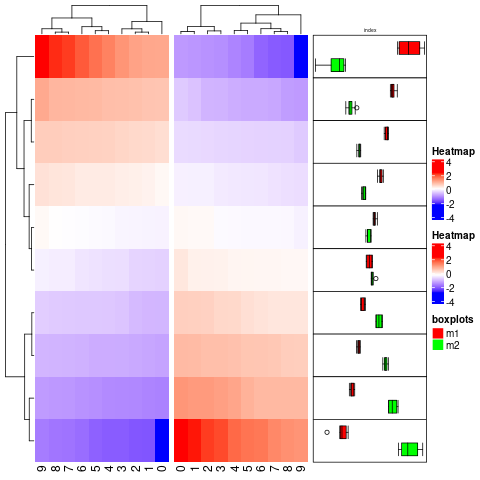

In [87]:
(
    Plot()
    + Heatmap(m1)
    + Heatmap(m2)
    + RowAnnotation(index, width=unit(4, 'cm'))
    + Annotation(
        geom=multiple_boxplot,
        mapping=aes(value='index')
    )
    + HeatmapTheme(
        annotation_legend_list=[
            legend_discrete(
                base.c(m1='red', m2='green'),
                title='boxplots'
            )
        ]
    )
)